Critea from Course Modules
 - Data analyses, including summarizing and visualizing data
 - Data preparation, including selecting, preprocessing, and transforming data
 - Models evaluation, including testing options, exploring algorithms, and reporting results

- Proof of concept ensuring the feasibility of the proposed solution
- Summarize and visualize data features
- Format, clean, sample, scale, decompose, or aggregate data
- Build and evaluate at least one model answering question
- Document and check in your codes using the GitHub repository

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('startup data.csv')

# Descriptive Statistcs

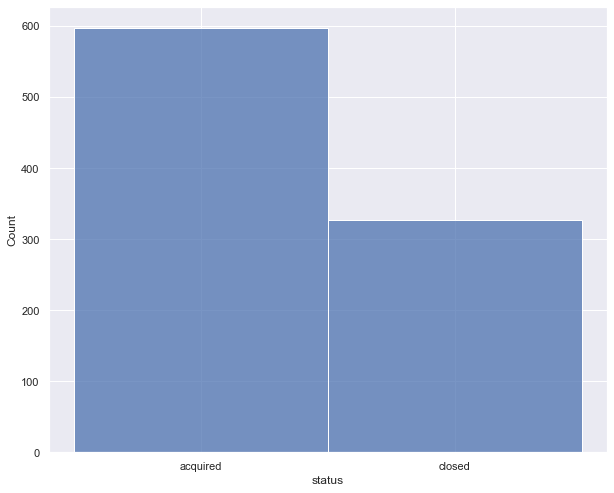

In [72]:
#distribution of  y
sns.histplot(x = 'status',data = data)
plt.savefig('output.png')

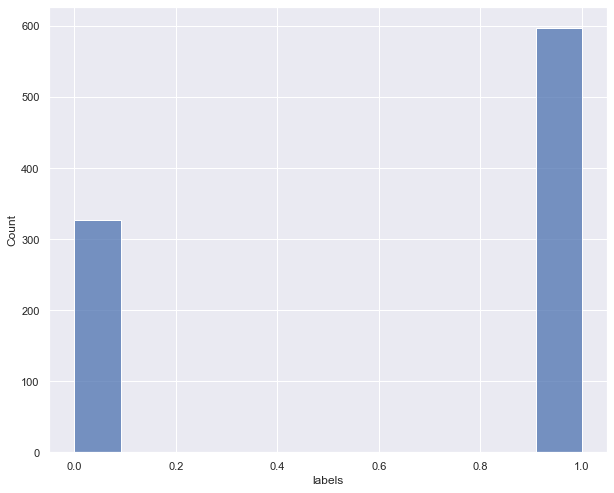

In [73]:
#distribution of  y
sns.histplot(x = 'labels',data = data)
plt.savefig('output.png')

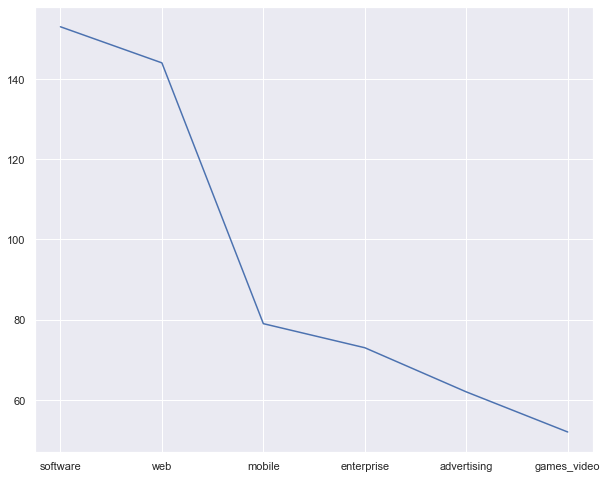

In [74]:
# top categories / industries
data['category_code'].value_counts()[:6].plot()
plt.savefig('output1.png')
# sns.catplot('category_code',data = data , 
#             kind= 'count',aspect = 10) #just show top 10

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


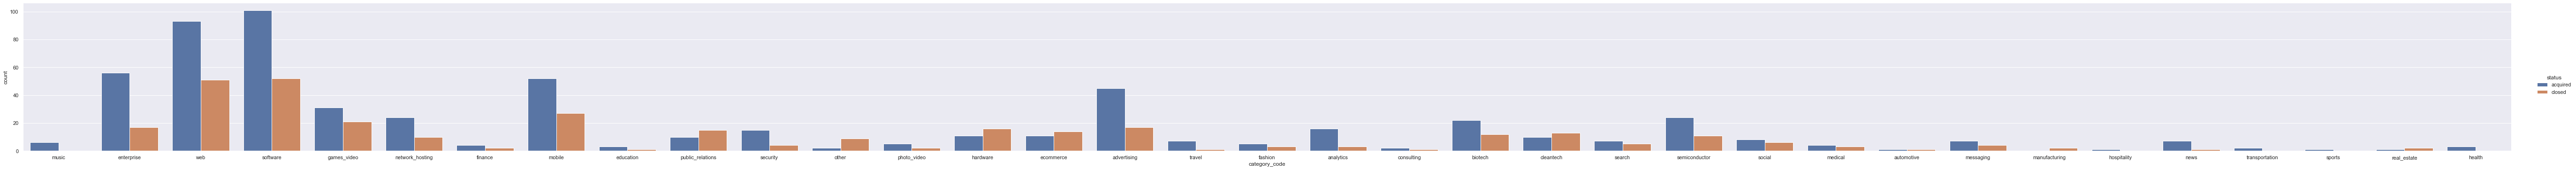

In [75]:
sns.catplot('category_code',data = data , kind= 'count', hue = 'status' ,aspect = 15)#just show top 10

#remove industry that are not as common and refer to the research paper saying to do this, count of each industry

In [76]:
data["founded_at_year"] =  pd.to_datetime(data["founded_at"], format="%m/%d/%Y")
data['founded_at_year'] = data['founded_at_year'].dt.to_period('Y')

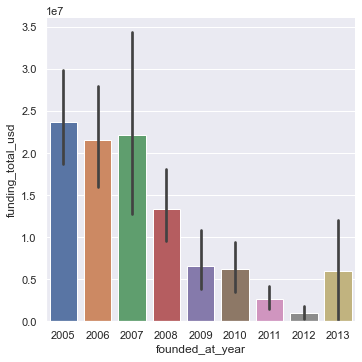

In [77]:
dataft = data[data["founded_at_year"] >= '2005'].sort_values("founded_at_year")
sns.catplot(data=dataft, x="founded_at_year", y= "funding_total_usd", kind="bar")
plt.savefig('output2.png')

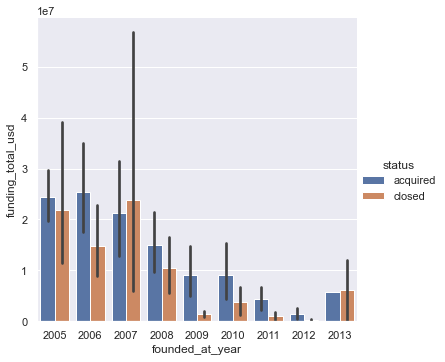

In [78]:
dataft = data[data["founded_at_year"] >= '2005'].sort_values("founded_at_year")
sns.catplot(data=dataft, x="founded_at_year", y= "funding_total_usd", hue="status",kind="bar")
plt.savefig('output3.png')

<AxesSubplot:xlabel='state_code', ylabel='funding_total_usd'>

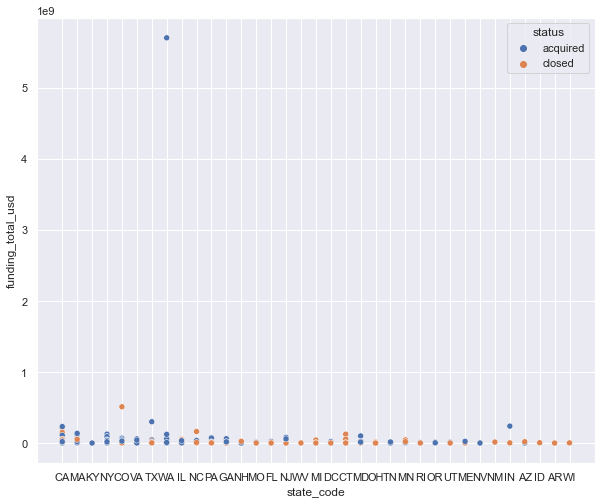

In [79]:
sns.set(rc={'figure.figsize':(10,8.2)})
sns.scatterplot(data=data, x="state_code", y="funding_total_usd", hue="status")

# Cleaning the dataset

In [80]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_at_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired,2000
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired,2009
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired,2002
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed,2010


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype        
---  ------                    --------------  -----        
 0   Unnamed: 0                923 non-null    int64        
 1   state_code                923 non-null    object       
 2   latitude                  923 non-null    float64      
 3   longitude                 923 non-null    float64      
 4   zip_code                  923 non-null    object       
 5   id                        923 non-null    object       
 6   city                      923 non-null    object       
 7   Unnamed: 6                430 non-null    object       
 8   name                      923 non-null    object       
 9   labels                    923 non-null    int64        
 10  founded_at                923 non-null    object       
 11  closed_at                 335 non-null    object       
 12  first_funding_at          923 non-nu

Removing irrelevant columns

In [3]:
data = data.drop(['Unnamed: 0','Unnamed: 6','object_id'], axis=1)

Editing entries

In [4]:
# "id" is the unique identifier for each company
# the first part of the entry will be removed to display the unique set of numbers only
data['id'] = data['id'].str[2:]

Removing Duplicates

In [5]:
data['id'].nunique()
# here we notice 922 unique ID but there 923 rows meaning there is a duplicate

922

In [6]:
data.duplicated(subset=['id']).sum()
#identify the duplicate rows 
data.loc[data.duplicated(subset=['id']), :]

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
832,CA,37.48151,-121.945328,94538,28482,Fremont,Redwood Systems,1,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,CA,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,2.25,1,acquired


In [7]:
#drop the duplicate row
data.loc[data['id']== '28482']
# data.drop_duplicates()

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,CA,37.54827,-121.988572,94538,28482,Fremont,Redwood Systems,1,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,CA,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,2.25,1,acquired
832,CA,37.48151,-121.945328,94538,28482,Fremont,Redwood Systems,1,1/1/2008,NaN,10/3/2008,5/30/2012,0.7562,4.4137,2.7836,4.0027,14,4,34250000,2,CA,1,0,0,0,0,cleantech,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,2.25,1,acquired


In [8]:
data.drop_duplicates()
#this function doesnt work because the longtitude and lattitude are slightly different although all else the same
data = data.drop(832)

fix data types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                922 non-null    object 
 1   latitude                  922 non-null    float64
 2   longitude                 922 non-null    float64
 3   zip_code                  922 non-null    object 
 4   id                        922 non-null    object 
 5   city                      922 non-null    object 
 6   name                      922 non-null    object 
 7   labels                    922 non-null    int64  
 8   founded_at                922 non-null    object 
 9   closed_at                 335 non-null    object 
 10  first_funding_at          922 non-null    object 
 11  last_funding_at           922 non-null    object 
 12  age_first_funding_year    922 non-null    float64
 13  age_last_funding_year     922 non-null    float64
 14  age_first_

In [10]:
data["founded_at"] =  pd.to_datetime(data["founded_at"], format="%m/%d/%Y")
data["closed_at"] =  pd.to_datetime(data["closed_at"], format="%m/%d/%Y")
data["first_funding_at"] =  pd.to_datetime(data["first_funding_at"], format="%m/%d/%Y")
data["last_funding_at"] =  pd.to_datetime(data["last_funding_at"], format="%m/%d/%Y")
# data['labels'] = data['labels'].apply(str)

Treat missing variables

age_first_milestone_year , age_last_milestone_year , closed_at 
all have missing variables 
closed_at : this can be explained because for all the companies that have been acquired(in the data its most) would not have a closed date so we need to be careful with this feature. Since the close date does not give any useful information on predicting succes considering the company has already been labeled as "closed" then we can remove this feature

age_first_milestone_year & age_last_milestone_year:


#replacing mean with rows that have na


In [11]:
#replacing mean with rows that have na
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(data['age_first_milestone_year'].mean())
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(data['age_last_milestone_year'].mean())

Treat outliers

# Feature Engineering

In [12]:
# Remove redundant columns
data = data.drop(['latitude','longitude','zip_code','closed_at','state_code.1'], axis=1)

In [13]:
#check "labels" and "status", which to use for target
g = data[['labels','status']]
g.groupby(['labels','status']).size() # use labels as the target

labels  status  
0       closed      326
1       acquired    596
dtype: int64

In [14]:
# features with first/last relationships can be aggregated to find differences

# Feature Selection

#correlation matrix and variance analysis

correlation coefficient

#Method 1
We need to set an absolute value, say 0.5 as the threshold for selecting the variables. If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable

#Method 2
The correlation-based feature selection (CFS)
"The goal is to find a feature subset with low feature-feature correlation, to avoid redundancy, and high feature-class correlation to maintain or increase predictive power."
https://johfischer.com/2021/08/06/correlation-based-feature-selection-in-python-from-scratch/

##
For analyzing between continous and continuous variable pearson correlation coefficient is used (feature-feature)
For analyzing between continous and binary variable Point biserial correlation is used (feature-target)
first we will only use continous variables to find which combonation of the continous is best
after i will change the algorthim to find best subset for the categorical/binary features

In [ ]:
#Method 2

In [29]:
from scipy.stats import pointbiserialr
from math import sqrt

In [30]:
label = 'labels'
features = data.columns.tolist()
#removing labels as well as non-continuous
features_c = [x for x in features if x in ('avg_participants','milestones','funding_total_usd','funding_rounds',
                                          'relationships','age_last_milestone_year','age_first_milestone_year',
                                          'age_first_funding_year','age_last_funding_year')]

data[features_c] = data[features_c].astype(float)
data['labels'] = data['labels'].astype(int)


In [31]:
def getMerit(subset, label):
    k = len(subset)

    # gets the average feature-class correlation using pointbiserialr function comparing each row to the target variable
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( data[label], data[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # gets the average feature-feature correlation using correlation matrix
    corr = data[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [32]:
#finds the feature with the highest feature-class correlation

best_value = -1
best_feature = ''
for feature in features_c:
    coeff = pointbiserialr( data[label], data[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

#relationships has the highest feature-class correlation


# not completed

Feature relationships with merit 0.3600


#Method 3 : Use features with a correlation with the correlation to the target > |0.1|

In [40]:
plt.figure(figsize=(12,10))
cor = data.corr()
cor

,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
labels,1.000000,-0.075201,0.073623,0.140427,0.230136,0.359993,0.205301,0.040150,0.328264,0.076518,0.060307,0.082016,-0.045149,-0.168716,0.012791,-0.000529,0.007560,0.074033,0.044585,-0.025705,-0.072082,0.000261,0.002420,-0.043631,-0.057749,-0.072407,0.183669,0.207495,0.164790,0.140257,0.186309,0.310394
age_first_funding_year,-0.075201,1.000000,0.762641,0.496246,0.394579,-0.187374,-0.154854,0.046388,-0.295876,-0.010202,-0.128366,0.020082,0.032705,0.080718,0.116547,-0.166924,-0.054866,-0.047524,-0.071524,-0.063958,-0.071701,0.190568,-0.012635,0.116730,0.169281,-0.346488,-0.292661,-0.059797,0.034617,0.121155,0.114190,0.050964
age_last_funding_year,0.073623,0.762641,1.000000,0.609426,0.560356,0.072958,0.386099,0.116365,-0.122929,0.006026,-0.143261,0.096387,0.015004,0.029412,0.116763,-0.216835,0.010941,0.006939,-0.056792,-0.078634,-0.108635,0.189829,0.029723,0.091769,0.351189,-0.354438,-0.099990,0.258930,0.317721,0.312421,0.122956,0.200670
age_first_milestone_year,0.140427,0.496246,0.609426,1.000000,0.777488,0.228551,0.177760,0.063783,-0.042823,0.030838,-0.089915,0.042973,0.009441,-0.002794,0.136225,-0.086533,-0.033186,-0.006177,-0.002074,-0.089358,-0.080579,0.051109,0.051751,0.028532,0.099511,-0.261813,0.013745,0.176043,0.190657,0.234171,0.051439,0.136193
age_last_milestone_year,0.230136,0.394579,0.560356,0.777488,1.000000,0.324755,0.238797,0.093365,0.261789,0.055267,-0.087156,0.026441,0.012137,-0.026438,0.071868,-0.019773,0.018165,0.000826,0.009490,-0.053781,-0.103028,0.001387,0.038868,-0.001235,0.081647,-0.234217,0.103491,0.241654,0.254502,0.233672,0.077054,0.181439
relationships,0.359993,-0.187374,0.072958,0.228551,0.324755,1.000000,0.358175,0.093785,0.513935,0.104959,0.050274,-0.004395,-0.012579,-0.157431,-0.087385,0.042633,0.034355,0.089937,0.111121,0.017088,-0.030891,-0.068094,0.078375,-0.075439,-0.030335,-0.060111,0.316501,0.284200,0.258705,0.207897,0.115409,0.221870
funding_rounds,0.205301,-0.154854,0.386099,0.177760,0.238797,0.358175,1.000000,0.115832,0.230191,0.009023,0.007913,0.080010,-0.018648,-0.062152,-0.017398,-0.091387,0.104780,0.079293,-0.000514,-0.003632,-0.051545,0.018594,0.028403,-0.014706,0.333579,0.011387,0.259646,0.443541,0.439669,0.324338,0.043495,0.258946
funding_total_usd,0.040150,0.046388,0.116365,0.063783,0.093365,0.093785,0.115832,1.000000,0.012050,-0.027606,-0.024472,-0.005652,-0.003978,0.057800,-0.018912,-0.030407,0.107409,-0.010931,-0.015000,-0.011818,-0.010782,0.026092,-0.001826,-0.012019,0.009999,-0.059631,-0.023783,0.020073,0.045394,0.045166,0.046269,0.048960
milestones,0.328264,-0.295876,-0.122929,-0.042823,0.261789,0.513935,0.230191,0.012050,1.000000,0.036067,0.104850,0.017601,-0.032836,-0.123859,-0.155998,0.175747,0.127475,0.083699,0.064890,0.071927,0.004841,-0.181084,0.006841,-0.136827,-0.093631,0.128356,0.320029,0.195166,0.085247,0.020708,0.043577,0.171373
is_CA,0.076518,-0.010202,0.006026,0.030838,0.055267,0.104959,0.009023,-0.027606,0.036067,1.000000,-0.380525,-0.332073,-0.230653,-0.562766,-0.038823,0.024508,-0.020506,-0.027994,0.002766,0.043224,-0.055880,0.023955,-0.022176,0.029971,-0.070175,-0.059181,0.075218,0.092182,0.073056,0.083395,0.069518,0.098239


<Figure size 864x720 with 0 Axes>

In [41]:
#Correlation with output variable
cor_target = abs(cor['labels'])
relevant_features = cor_target[abs(cor_target)>0.1]
relevant_features

labels                      1.000000
age_first_milestone_year    0.140427
age_last_milestone_year     0.230136
relationships               0.359993
funding_rounds              0.205301
milestones                  0.328264
is_otherstate               0.168716
has_roundA                  0.183669
has_roundB                  0.207495
has_roundC                  0.164790
has_roundD                  0.140257
avg_participants            0.186309
is_top500                   0.310394
Name: labels, dtype: float64

In [15]:
data1 = data[['age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','milestones',
             'is_otherstate','has_roundA','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants',
             'is_top500','labels']]

# Data Manipulation

In [ ]:
#ADASYN

# Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

In [16]:
datax = data.loc[:, data.columns != 'labels']
datax = datax.loc[:, datax.columns != 'status']
datay = data['labels']

In [17]:
#using the subset of features after feature selection methods
datax1 = data1.loc[:, data1.columns != 'labels']
datay1 = data1['labels']

In [20]:
#raw data/resutls
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.25, random_state=0)

In [21]:
#data after initial feature selection 
x_train1, x_test1, y_train1, y_test1 = train_test_split(datax1, datay1, test_size=0.25, random_state=0)

# Model

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logisticRegr = LogisticRegression()

#dummy variables for non-numeric data

In [24]:
datax.columns

Index(['state_code', 'id', 'city', 'name', 'founded_at', 'first_funding_at',
       'last_funding_at', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500'],
      dtype='object')

In [27]:
state_code = pd.get_dummies(datax['state_code'], drop_first = True)
city = pd.get_dummies(datax['city'], drop_first = True)
founded_at = pd.get_dummies(datax['founded_at'], drop_first = True)
first_funding_at = pd.get_dummies(datax['first_funding_at'], drop_first = True)
last_funding_at = pd.get_dummies(datax['last_funding_at'], drop_first = True)
category_code = pd.get_dummies(datax['category_code'], drop_first = True)


In [25]:
# datax['labels'] = datax['labels'].astype(int)

In [29]:
datax.info()
datax

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                922 non-null    object        
 1   id                        922 non-null    object        
 2   city                      922 non-null    object        
 3   name                      922 non-null    object        
 4   founded_at                922 non-null    datetime64[ns]
 5   first_funding_at          922 non-null    datetime64[ns]
 6   last_funding_at           922 non-null    datetime64[ns]
 7   age_first_funding_year    922 non-null    float64       
 8   age_last_funding_year     922 non-null    float64       
 9   age_first_milestone_year  922 non-null    float64       
 10  age_last_milestone_year   922 non-null    float64       
 11  relationships             922 non-null    int64         
 12  funding_rounds        

,state_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,CA,6669,San Diego,Bandsintown,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,CA,16283,Los Gatos,TriCipher,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,CA,65620,San Diego,Plixi,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,CA,42668,Cupertino,Solidcore Systems,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,CA,65806,San Francisco,Inhale Digital,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,21343,San Francisco,CoTweet,2009-01-01,2009-07-09,2009-07-09,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1
919,MA,41747,Burlington,Reef Point Systems,1998-01-01,2005-04-01,2007-03-23,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1
920,CA,31549,Sunnyvale,Paracor Medical,1999-01-01,2007-06-29,2007-06-29,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1
921,CA,33198,San Francisco,Causata,2009-01-01,2009-10-05,2011-11-01,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1


In [30]:
datax.drop(['state_code','city', 'name','founded_at','first_funding_at',
            'last_funding_at','category_code','id'], axis = 1 , inplace = True)

In [32]:
datax = pd.concat([datax,city,founded_at,first_funding_at,last_funding_at, category_code],axis = 1)
datax

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                    2.2493                 3.0027                    4.6685   
1                    5.1260                 9.9973                    7.0055   
2                    1.0329                 1.0329                    1.4575   
3                    3.1315                 5.3151                    6.0027   
4                    0.0000                 1.6685                    0.0384   
..                      ...                    ...                       ...   
918                  0.5178                 0.5178                    0.5808   
919                  7.2521                 9.2274                    6.0027   
920                  8.4959                 8.4959                    9.0055   
921                  0.7589                 2.8329                    0.7589   
922                  3.1205                 3.1205                    4.0027   

     age_last_milestone_year  relationships  funding_rounds  \
0                     6.7041              3               3   
1                     7.0055              9               4   
2                     2.2055              5               1   
3                     6.0027              5               3   
4                     0.0384              2               2   
..                       ...            ...             ...   
918                   4.5260              9               1   
919                   6.0027              1               3   
920                   9.0055              5               1   
921                   3.8356             12               2   
922                   4.0027              4               1   

     funding_total_usd  milestones  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0               375000           3      1      0      0      0              0   
1             40100000           1      1      0      0      0              0   
2              2600000           2      1      0      0      0              0   
3             40000000           1      1      0      0      0              0   
4              1300000           1      1      0      0      0              0   
..                 ...         ...    ...    ...    ...    ...            ...   
918            1100000           2      1      0      0      0              0   
919           52000000           1      0      0      1      0              0   
920           44000000           1      1      0      0      0              0   
921           15500000           2      1      0      0      0              0   
922           20000000           1      1      0      0      0              0   

     is_software  is_web  is_mobile  is_enterprise  is_advertising  \
0              0       0          0              0               0   
1              0       0          0              1               0   
2              0       1          0              0               0   
3              1       0          0              0               0   
4              0       0          0              0               0   
..           ...     ...        ...            ...             ...   
918            0       0          0              0               1   
919            0       0          0              0               0   
920            0       0          0              0               0   
921            1       0          0              0               0   
922            0       0          0              0               0   

     is_gamesvideo  is_ecommerce  is_biotech  is_consulting  is_othercategory  \
0                0             0           0              0                 1   
1                0             0           0              0                 0   
2                0             0           0              0                 0   
3                0             0           0              0                 0   
4                1             0           0              0         

In [33]:
#resplit the data using the data after encoding
x_train, x_test, y_train, y_test = train_test_split(datax, datay, test_size=0.25, random_state=0)

In [34]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [35]:
predictions = logisticRegr.predict(x_test)

In [36]:
# get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.6320346320346321


In [ ]:
#feature importance graph

In [37]:
#Model Output using New subset of features
#resplit the data using the data after encoding
x_train1, x_test1, y_train1, y_test1 = train_test_split(datax1, datay1, test_size=0.25, random_state=0)

In [38]:
logisticRegr.fit(x_train1, y_train1)

LogisticRegression()

In [39]:
predictions1 = logisticRegr.predict(x_test1)

In [42]:
score1 = logisticRegr.score(x_test1, y_test1)
print(score1)

0.7402597402597403


In [ ]:
# Here we observe an increase in the Accuracy by 10% from the feature selection, next steps we will do further feature Selection aswell as
# comparing the results against other evaulation metrics

Random Forest

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
features = datax #df without target variable

In [46]:
#Split data into train an test
X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.25, random_state=0) #use the same data that is encoded already from the logistic regression


In [47]:
#Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [48]:
#Evaluate the model:
print("accuracy on training set: %f" % rf.score(X_train, y_train))
print("accuracy on test set: %f" % rf.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.783550


In [ ]:
# Evaluate Model using 

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train1, y_train1)
print("accuracy on training set: %f" % rf.score(x_train1, y_train1))
print("accuracy on test set: %f" % rf.score(x_test1, y_test1))

#Feature selection slightly imporoved the model for random forest but not as much as for logistic regression  

accuracy on training set: 1.000000
accuracy on test set: 0.796537


XGBoost

In [216]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [215]:
# fit model no training data
# model = XGBClassifier()

In [ ]:
model.fit(X_train, y_train)

# Cross Validation

# Model Evaluation (which has the best preformance)

# Resources

https://johfischer.com/2021/08/06/correlation-based-feature-selection-in-python-from-scratch/ 
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
https://pbpython.com/categorical-encoding.html
https://pub.towardsai.net/random-forest-for-binary-classification-hands-on-with-scikit-learn-4909e29c29f5